# Ford GoBike Data Analysis
## by Diego ZUNIGA ORTIZ

## Preliminary Wrangling

This is an analysis of the database of a bike Service in San Francisco during the year 2017 containing more than 500000 bike trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year member_gender  
0            -122.415929       96    Customer             1987.0          Male  
1            -122.426614       88    Customer             1965.0        Female  
2            -122.267764     1094    Customer                NaN           NaN  
3            -122.408445     2831    Customer                NaN           NaN  
4            -122.265896     3167  Subscriber             1997.0        Female

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [5]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.000000             37.774520   
50%                -122.398870       66.000000             37.783830   
75%                -122.391034      134.000000             37.795392   
max                -121.874119      340.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          519700.000000  519700.000000      453159.000000  
mean             -122.363236    1672.533079        1980.404787  
std                 0.105122     971.356959          10.513488  
min              -122.444293      10.000000        1886.000000  
25%              -122.410345     787.000000        1974.000000  
50%              -122.398525    1728.500000        1983.000000  
75%              -122.391034    2520.000000        1988.000000  
max              -121.874119    3733.000000        1999.000000

In [6]:
# convert dates to date type
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [7]:
# convert ids from integer to string
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

Due to the relevance of the user information to get some insights and since is the only information containing null values, I decided to drop the rows with null values in user birth year or gender.

In [8]:
df.dropna(inplace=True)

In [9]:
# convert user birth year from float to integer
df.member_birth_year = df.member_birth_year.astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null object
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null object
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null object
user_type                  453159 non-null object
member_birth_year          453159 non-null int64
member_gender              453159 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(7)
memory usage: 55.3+ MB


### What is the structure of your dataset?

After cleaning it, is a dataset containing 453159 bike trips all made in the year 2017.
Every trip is described with information about the time, the start and end stations, the bike and the user.
>Time:
> - Duration in seconds
> - Start time
> - End Time

>Stations:
> - Start station id
> - Start station name
> - Start station latitude
> - Start station longitude
> - End station id
> - End station name
> - End station latitude
> - End station longitude

>Bike:
> - Bike id

>User:
> - User type
> - User birth year
> - User gender


### What is/are the main feature(s) of interest in your dataset?

> The most relevant information is the user information and the start end trip time and location.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The user data can provide interesting information about demography in bike use.
> In the other hand start and end information could give good information about the time when the service is more used and the zones of the city where the demand is higher.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> First let's look at the duration of trips.

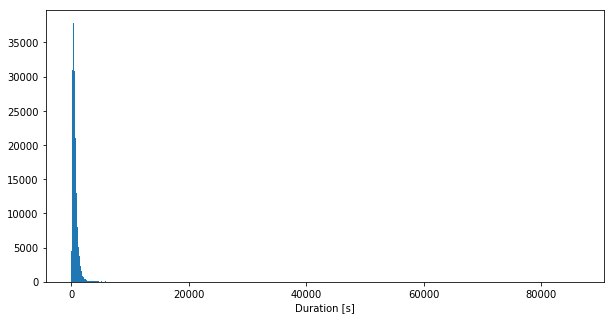

In [11]:
intervals = np.arange(0, df['duration_sec'].max() + 60, 60)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_sec', bins = intervals)
plt.xlabel('Duration [s]')
plt.show()

This graphic shows that there are outliers, so let's filter them to see beter what happens with this variable

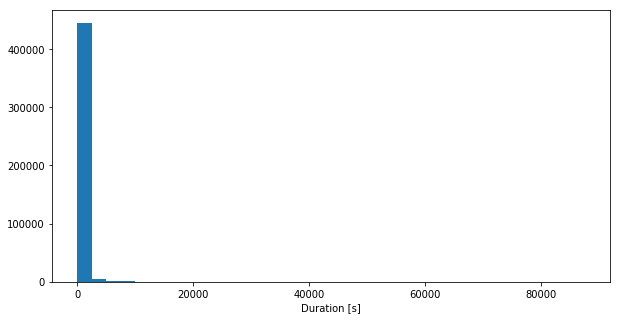

In [12]:
intervals = np.arange(0, df['duration_sec'].max() + 2500, 2500)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_sec', bins = intervals)
plt.xlabel('Duration [s]')
plt.show()

Looking at the histogramme with thicker intervals we can see that the most of the trips are under 10000 seconds.
So let's apply this filter to see a tendency.

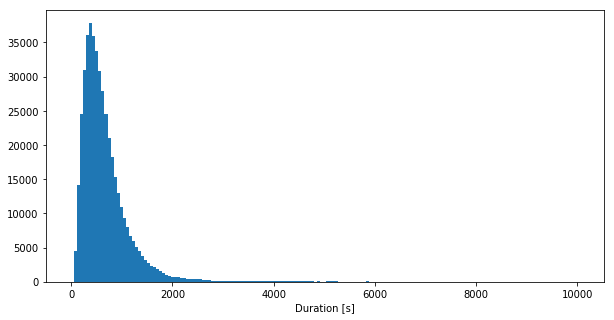

In [13]:
filtered_df = df[df['duration_sec'] < 10000]
intervals = np.arange(0, filtered_df['duration_sec'].max() + 60, 60)
plt.figure(figsize=[10, 5])

plt.hist(data = filtered_df, x = 'duration_sec', bins = intervals)
plt.xlabel('Duration [s]')
plt.show()

We can even look closer under 3000 seconds.

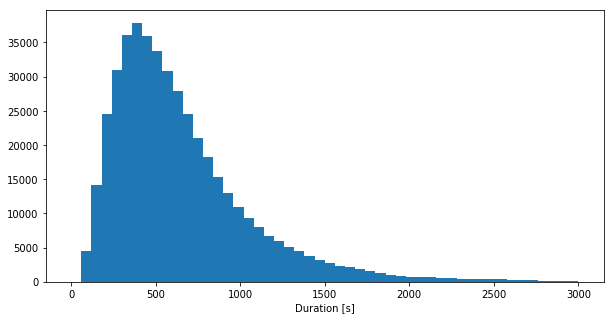

In [14]:
filtered_df = df[df['duration_sec'] < 3000]
intervals = np.arange(0, filtered_df['duration_sec'].max() + 60, 60)
plt.figure(figsize=[10, 5])
plt.hist(data = filtered_df, x = 'duration_sec', bins = intervals)
plt.xlabel('Duration [s]')
plt.show()

And now it is clear that the histogram is skewed to the right, and the bike trips tend to be concentrated between 1 and 15 minutes approx.

> Now let's look at the users information. Let's start with gender.

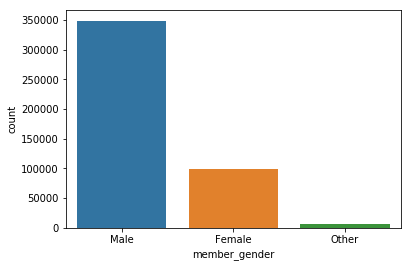

In [15]:
sb.countplot(data=df, x='member_gender')

This shows that the service is used for more men than women.

> the user type:

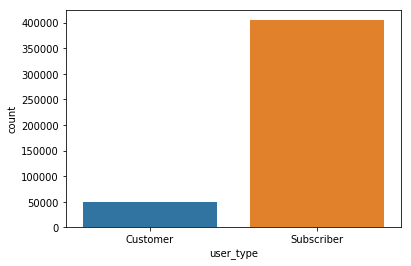

In [16]:
sb.countplot(data=df, x='user_type')

Here we can see that the service is widely more used by subscribers than other customers.

> ... and the birth year of the members.

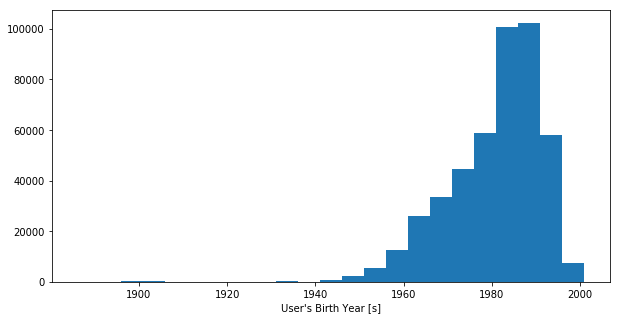

In [17]:
intervals = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max() + 5, 5)
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'member_birth_year', bins = intervals)
plt.xlabel("User's Birth Year [s]")
plt.show()

The distribution here is skewed to the left and as expected, the people under 40 years old are more likely to use the service.

> Now let's take a look at the start date and see it by month, hour of the day and day of the week.

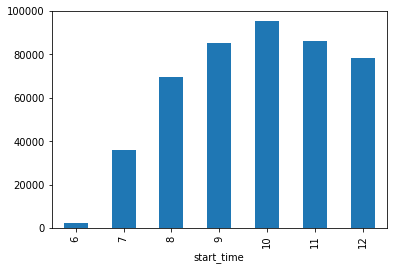

In [18]:
df.start_time.groupby(df["start_time"].dt.month).count().plot(kind="bar")

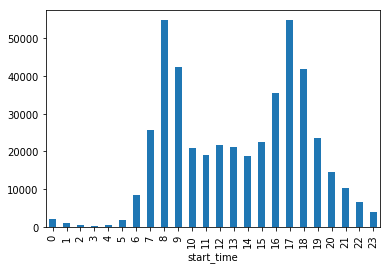

In [19]:
df.start_time.groupby(df["start_time"].dt.hour).count().plot(kind="bar")

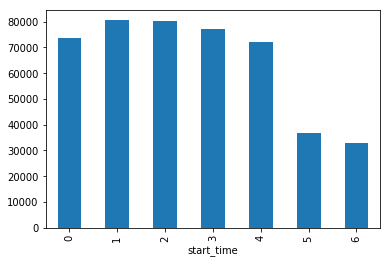

In [20]:
df.start_time.groupby(df["start_time"].dt.weekday).count().plot(kind="bar")

The last three graphics show that:
- Our data starts in June and after that, october is the most used month
- In a day the peack times are 8AM and 17PM.
- In a week, the weekends are less bussy that working days.

The ending time was not plot assuming that most of the trips are short and finish some minutes after started.


> Looking at the bike ids, even when it might seem like a not very useful feature, it can show us how homogene the system is used, and see if there are bikes that are considerably more used than others.

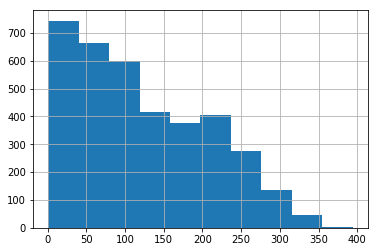

In [21]:
df.bike_id.groupby(df.bike_id).count().hist()

This histogram shows that not all the bikes are equally used.

> We can do the same with the stations ids and see the distribution of the system use among the stations.

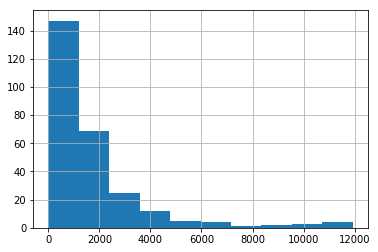

In [22]:
df.start_station_id.groupby(df.start_station_id).count().hist()

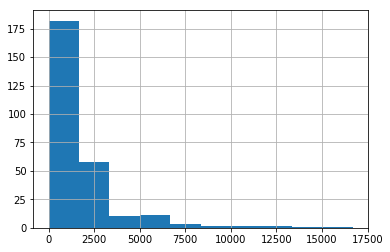

In [23]:
df.end_station_id.groupby(df.end_station_id).count().hist()

Last two graphics show that the use of the stations is also not very homogene.

> Finally we can look at the position stations to see the distribution of the rides in north-south or east-west.

In [24]:
df.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  453159.000000           453159.000000            453159.000000   
mean      832.934014               37.771968              -122.364093   
std      2525.280717                0.084914                 0.104240   
min        61.000000               37.317298              -122.444293   
25%       364.000000               37.773492              -122.411726   
50%       556.000000               37.782411              -122.398525   
75%       838.000000               37.795392              -122.391034   
max     86252.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  
count         453159.000000          453159.000000      453159.000000  
mean              37.772090            -122.363274        1980.404787  
std                0.084811               0.103723          10.513488  
min               37.317298            -122.444293        1886.000000  
25%               37.773793            -122.409851        1974.000000  
50%               37.782411            -122.397405        1983.000000  
75%               37.795392            -122.391034        1988.000000  
max               37.880222            -121.874119        1999.000000

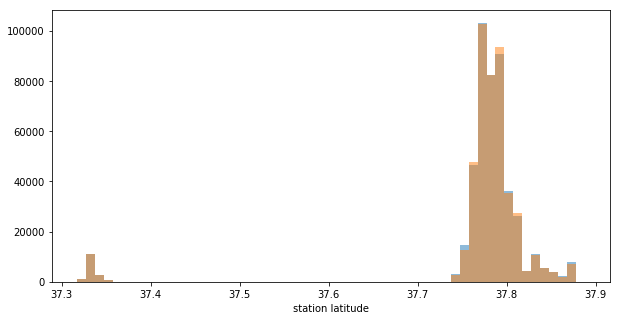

In [25]:
intervals_start = np.arange(df['start_station_latitude'].min(), df['start_station_latitude'].max() + 0.01, 0.01)
intervals_end = np.arange(df['end_station_latitude'].min(), df['end_station_latitude'].max() + 0.01, 0.01)
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'start_station_latitude', bins = intervals_start, alpha=0.5)
plt.hist(data = df, x = 'end_station_latitude', bins = intervals_end, alpha=0.5)
plt.xlabel("station latitude")
plt.show()

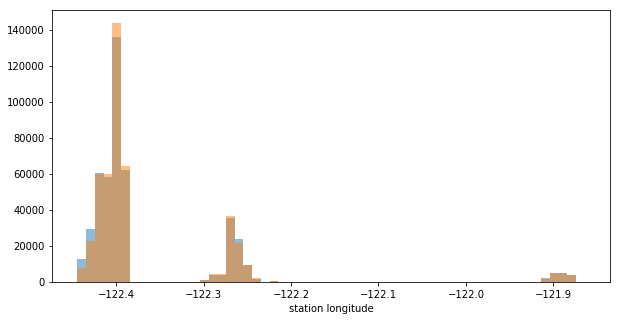

In [26]:
intervals_start = np.arange(df['start_station_longitude'].min(), df['start_station_longitude'].max() + 0.01, 0.01)
intervals_end = np.arange(df['end_station_longitude'].min(), df['end_station_longitude'].max() + 0.01, 0.01)
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'start_station_longitude', bins = intervals_start, alpha=0.5)
plt.hist(data = df, x = 'end_station_longitude', bins = intervals_end, alpha=0.5)
plt.xlabel("station longitude")
plt.show()

Here we can see some kind of zones within the city and apparently most of the bikes stay in their zones.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main findings are summarized as follows:
Duration of rides:
	Skewed right with most of the trips under 30 minutes.
Users:
	Mainly male
	Mostly subscribers
	And mostly young adults
Dates:
	Autum has more use.
	8 and 17 are peak hours.
	In weekends the system is less used.
Distribution of the use of the system:
	Not uniform for bikes and stations
Geography:
	There are some zones and bikes mostly stay in their zones.
    
I needed to filter the duration of the trips because there were outliers with values too high and in an amount too low comparing with the rest of the data set, and it was producing non clear visualizations.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Beside filtering the duration times, I changed some data types, like ids were transformed from int to str, the birth years of the users were from float to int and the dates from str to datatype. This helps to build graphics more accurately.

## Bivariate Exploration

Let's start looking at the correlations between pairs of data for numerical variables.

In [27]:
df.head(1)

duration_sec              start_time                end_time  \
0         80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   

  start_station_id     start_station_name  start_station_latitude  \
0               74  Laguna St at Hayes St               37.776435   

   start_station_longitude end_station_id  \
0              -122.426244             43   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   

   end_station_longitude bike_id user_type  member_birth_year member_gender  
0            -122.415929      96  Customer               1987          Male

In [28]:
variables = ['duration_sec',
             'start_station_latitude',
             'start_station_longitude',
             'end_station_latitude',
             'end_station_longitude',
             'member_birth_year']

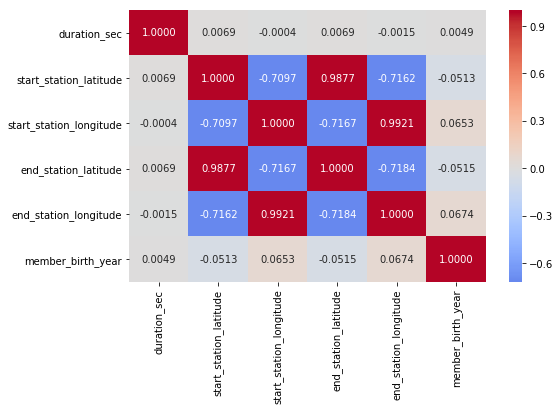

In [29]:
plt.figure(figsize = [8, 5])
sb.heatmap(df[variables].corr(), annot = True, fmt = '.4f',
           cmap = 'coolwarm', center = 0)
plt.show()

The only variables that seem to have some strong correlation are the coordinates of the station positions.

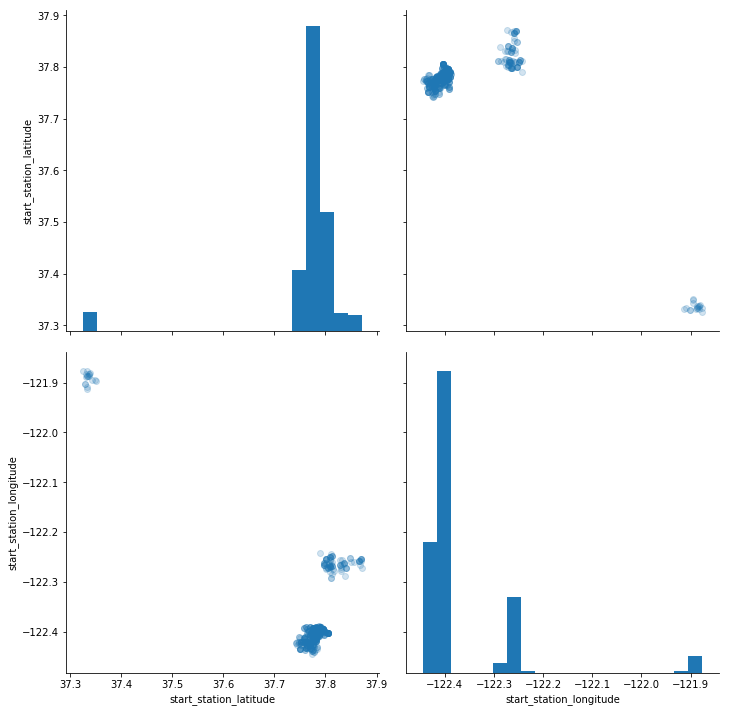

In [30]:
variables = ['start_station_latitude',
             'start_station_longitude']

samples = np.random.choice(filtered_df.index, 500, replace = False)
rides_sample = filtered_df.loc[samples,:]

g = sb.PairGrid(data = rides_sample, vars = variables, height = 5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, marker='o', alpha=0.2)

Here we can see those zones that I mentioned before, apparently there are three big zones for this service in San Francisco. Looking at the map it seem to be San Francisco, Oakland and San Jose.

It would be interesting to visualize a flowchart to see where are the bikes moving to and what are the routes with higher demand. In order to do this it would be useful to separate the trips in 4 categories:
- San Francisco
- Oakland
- San José
- Long trip intercities.

Later it would be possible to compare age and gender of users within the cities and in the long trips try to know what kind of people is doing them.

In [31]:
#Let's create the zones of stations SF, OA, SJ
sf_max_long = -122.35
oa_max_long = -122
start_zone = []
end_zone = []
for k, row in df.iterrows():
    if row['start_station_longitude'] < sf_max_long:
        start_zone.append('SF')
    elif row['start_station_longitude'] < oa_max_long:
        start_zone.append('OA')
    else:
        start_zone.append('SJ')
    if row['end_station_longitude'] < sf_max_long:
        end_zone.append('SF')
    elif row['end_station_longitude'] < oa_max_long:
        end_zone.append('OA')
    else:
        end_zone.append('SJ')
df['start_zone'] = start_zone
df['end_zone'] = end_zone
df.head()

duration_sec              start_time                end_time  \
0          80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1          78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
4          43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   
6           4507 2017-12-31 23:49:28.422 2018-01-01 01:04:35.619   
12          2183 2017-12-31 23:52:55.581 2018-01-01 00:29:18.743   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
4               239                      Bancroft Way at Telegraph Ave   
6               259                            Addison St at Fourth St   
12               67  San Francisco Caltrain Station 2  (Townsend St...   

    start_station_latitude  start_station_longitude end_station_id  \
0                37.776435              -122.426244             43   
1                37.784872              -122.400876             96   
4                37.868813              -122.258764            247   
6                37.866249              -122.299371            259   
12               37.776639              -122.395526             24   

                                     end_station_name  end_station_latitude  \
0   San Francisco Public Library (Grove St at Hyde...             37.778768   
1                               Dolores St at 15th St             37.766210   
4                           Fulton St at Bancroft Way             37.867789   
6                             Addison St at Fourth St             37.866249   
12                              Spear St at Folsom St             37.789677   

    end_station_longitude bike_id   user_type  member_birth_year  \
0             -122.415929      96    Customer               1987   
1             -122.426614      88    Customer               1965   
4             -122.265896    3167  Subscriber               1997   
6             -122.299371    3539    Customer               1991   
12            -122.390428    2311  Subscriber               1990   

   member_gender start_zone end_zone  
0           Male         SF       SF  
1         Female         SF       SF  
4         Female         OA       OA  
6         Female         OA       OA  
12          Male         SF       SF

In [32]:
# let's see now if there are actually long trips intercities
len(df[df['start_zone'] != df['end_zone']])

33

In [33]:
df['route'] = df['start_station_id'] + '-' + df['end_station_id']

In [34]:
#Let's make now dataframes per zone in order to compare them and visualize things per type of trip
intercities = df[df['start_zone'] != df['end_zone']]
local = df[df['start_zone'] == df['end_zone']]
sanFrancisco = local[local['start_zone'] == 'SF']
oakland = local[local['start_zone'] == 'OA']
sanJose = local[local['start_zone'] == 'SJ']

We will use them later

Now let's see if the duration of the trips changes with the age of people and the gender.

In [35]:
df.groupby('member_gender').duration_sec.mean()

member_gender
Female    1027.780327
Male       774.440899
Other     1019.258771
Name: duration_sec, dtype: float64

In [36]:
filtered_df.groupby('member_gender').duration_sec.mean()

member_gender
Female    739.405403
Male      623.466071
Other     718.911650
Name: duration_sec, dtype: float64

In average the tips of woman are longer than trips of men, even after filtering the longest trips women have a longer average but with a very smaller difference. Apparently the longest trips are taken mostly by women.

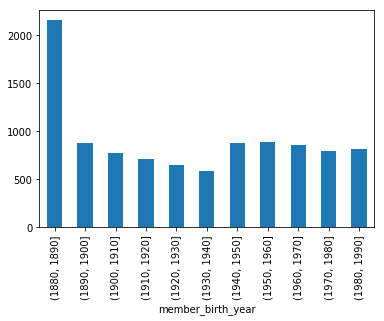

In [37]:
df.groupby(pd.cut(df["member_birth_year"], np.arange(min(df["member_birth_year"])-6, max(df["member_birth_year"]), 10))).duration_sec.mean().plot(kind='bar')

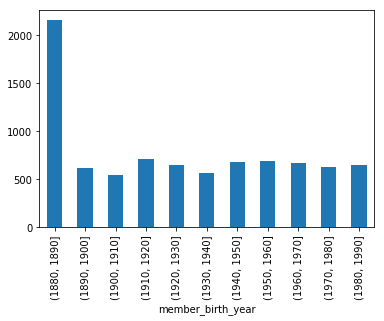

In [38]:
filtered_df.groupby(pd.cut(filtered_df["member_birth_year"], np.arange(min(filtered_df["member_birth_year"])-6, max(filtered_df["member_birth_year"]), 10))).duration_sec.mean().plot(kind='bar')

Looking at the average duration of rides per decade of birth of the users it seems to be quite independent, even filtering the high outliers of duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> So far it has been possible to observe some kind of segmentation fo the rides by zone, which seems to be quite normal considering that the system includes three cities.
In my opinion the most interesting observation could be the flow of trips within the cities. Try to visualize how the people is moving during the day and where are the areas of higher demand.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I jut checked that there is no much relationship between age and duration of the trips. I also saw that women use more the system than men (in average).

## Multivariate Exploration


Let's visualize the lines that connect stations in the trips and try to identify the routes that are the most used. And also see how it changes during the day and per city.

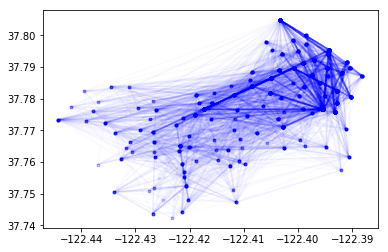

In [39]:
samples = np.random.choice(sanFrancisco.index, 5000, replace = False)
rides_sample = sanFrancisco.loc[samples,:]
y = [rides_sample['start_station_latitude'], rides_sample['end_station_latitude']]
x = [rides_sample['start_station_longitude'], rides_sample['end_station_longitude']]

plt.plot(x, y, color='b', alpha=0.02, marker='.');

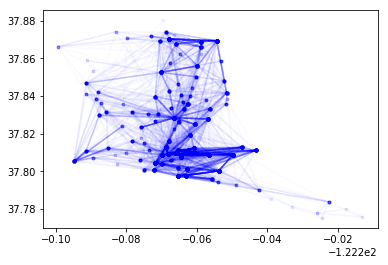

In [40]:
samples = np.random.choice(oakland.index, 5000, replace = False)
rides_sample = oakland.loc[samples,:]
y = [rides_sample['start_station_latitude'], rides_sample['end_station_latitude']]
x = [rides_sample['start_station_longitude'], rides_sample['end_station_longitude']]
plt.plot(x, y, color='b', alpha=0.02, marker='.');

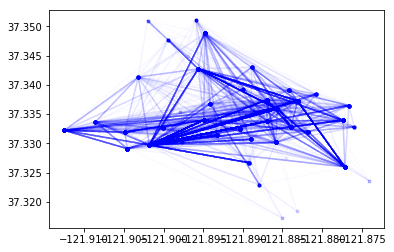

In [41]:
samples = np.random.choice(sanJose.index, 5000, replace = False)
rides_sample = sanJose.loc[samples,:]
y = [rides_sample['start_station_latitude'], rides_sample['end_station_latitude']]
x = [rides_sample['start_station_longitude'], rides_sample['end_station_longitude']]
plt.plot(x, y, color='b', alpha=0.02, marker='.');

Here we can see that every city has specific places with high demand of bikes.
Now what could be interesting is to see where are the bikes going during the day in order to see if works and schools as common destination places are well distributed or rather centralized.

**First for San Francisco**

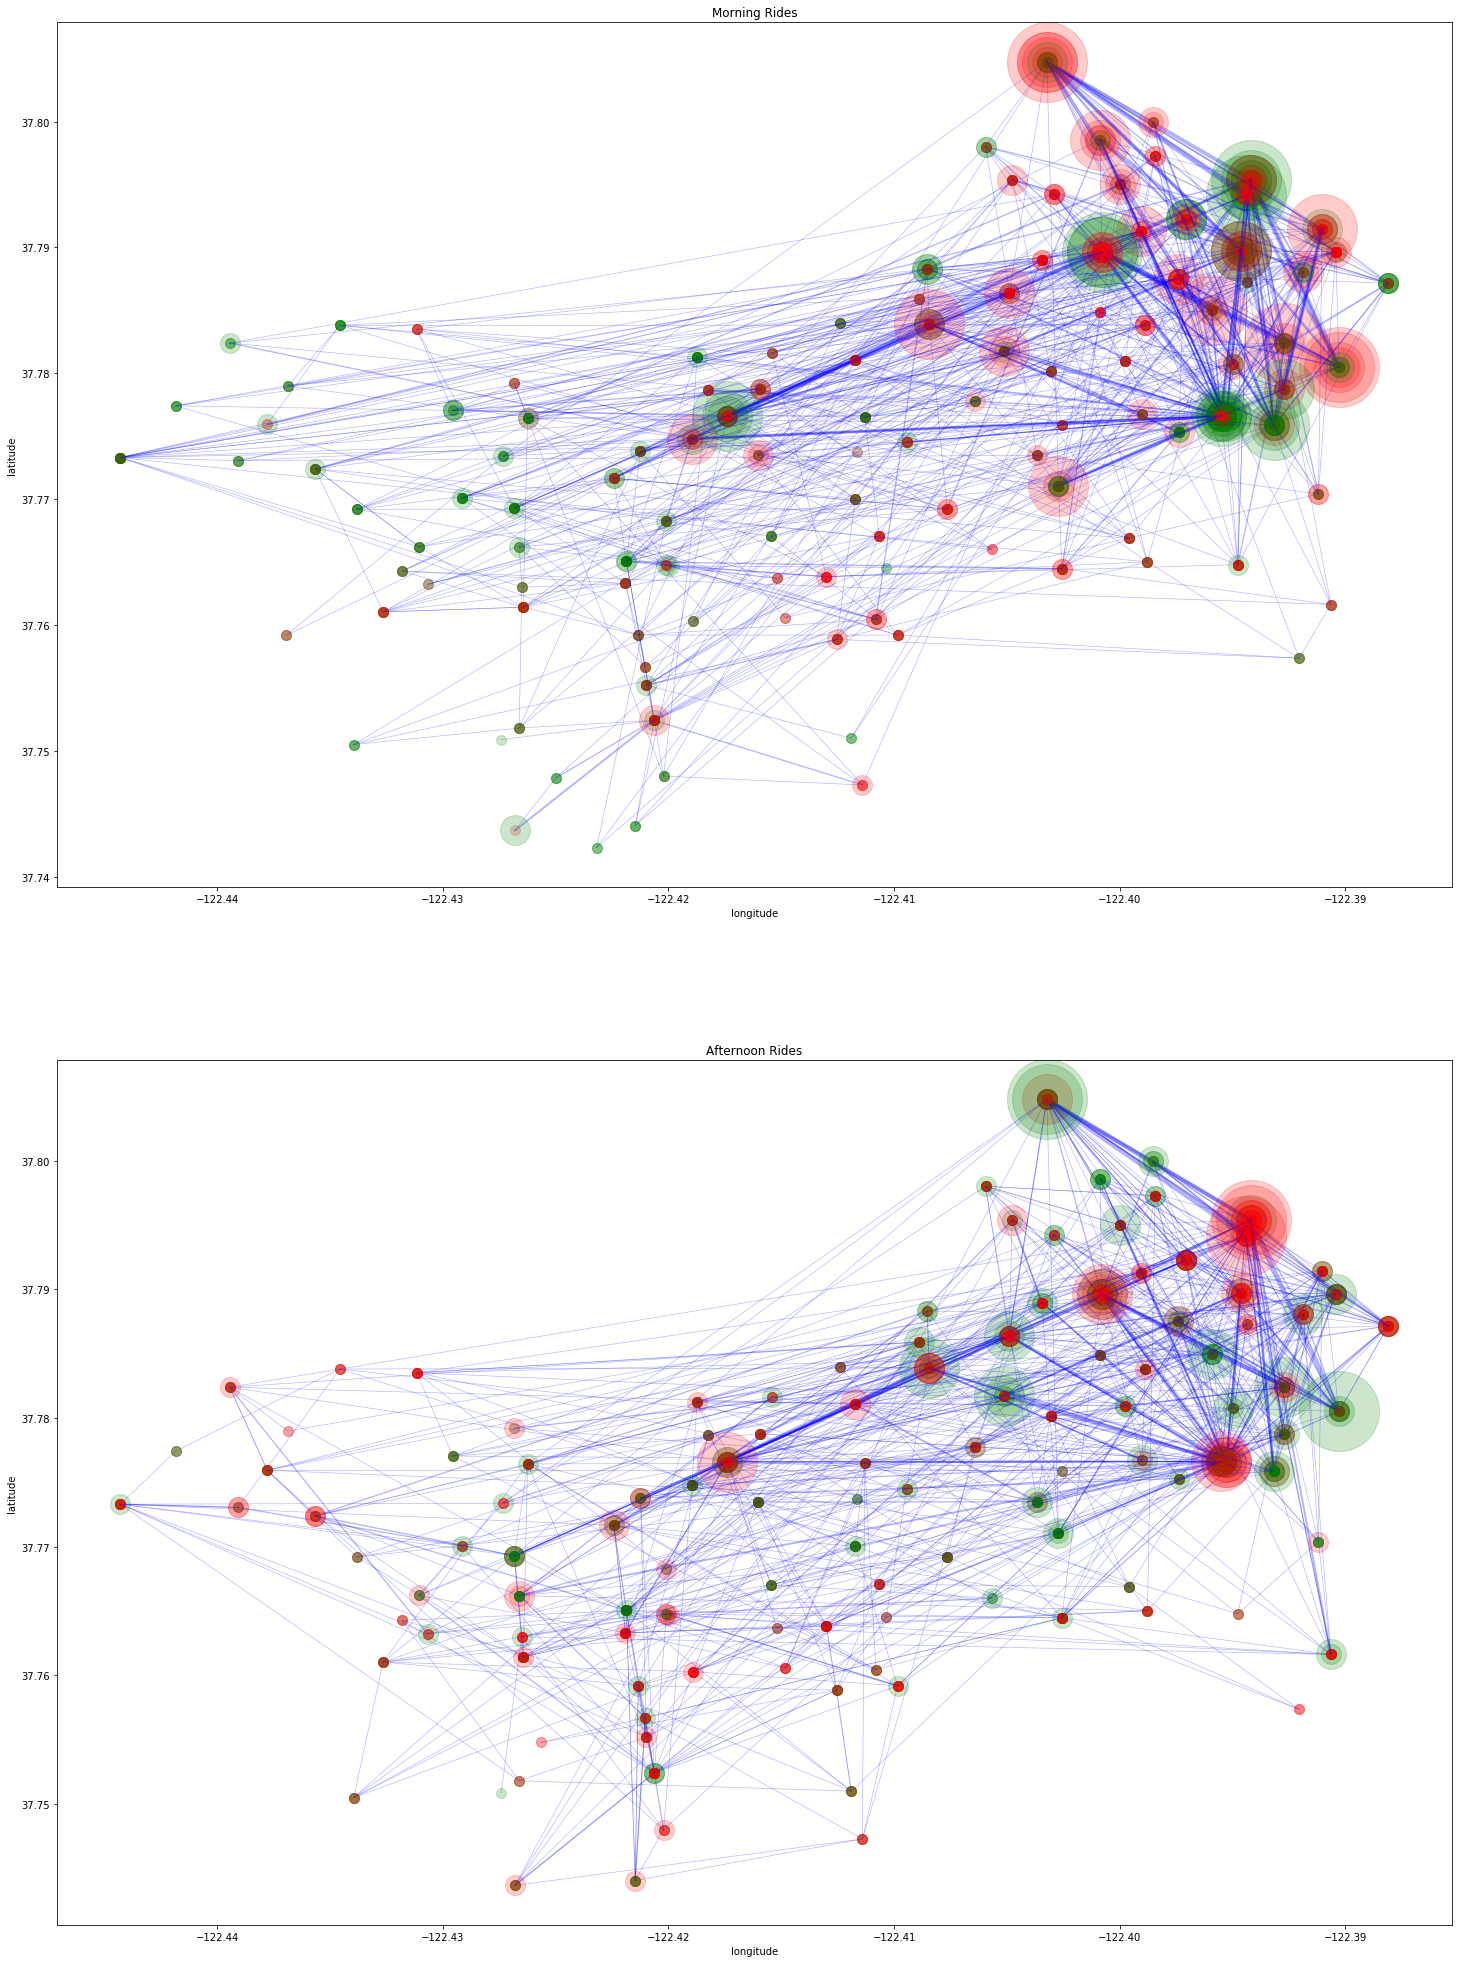

In [42]:
# separate the city database in morning and afternoon
morning = sanFrancisco[sanFrancisco["start_time"].dt.hour < 12]
afternoon = sanFrancisco[sanFrancisco["start_time"].dt.hour >= 12]

# plotting morning
samples = np.random.choice(morning.index, 1000, replace = False)
rides_sample = morning.loc[samples,:]

ig, ax = plt.subplots(nrows = 2, figsize = [25,35])
routes_count = rides_sample.groupby('route')['duration_sec'].count()
routes_x1 = rides_sample.groupby('route')['start_station_longitude'].mean()
routes_x2 = rides_sample.groupby('route')['end_station_longitude'].mean()
routes_y1 = rides_sample.groupby('route')['start_station_latitude'].mean()
routes_y2 = rides_sample.groupby('route')['end_station_latitude'].mean()
ax[0].set_title('Morning Rides')
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
for i in range(len(routes_count)):
    y = [routes_y1[i], routes_y2[i]]
    x = [routes_x1[i], routes_x2[i]]
    size= routes_count[i]
    ax[0].plot(x, y, color='b', alpha=0.3, linewidth=5 * size / max(routes_count))
    ax[0].plot(x[0], y[0], color='g', alpha=0.2, marker='o', markersize=10 * size)
    ax[0].plot(x[1], y[1], color='r', alpha=0.2, marker='o', markersize=10 * size)

#plotting afternoon
samples = np.random.choice(afternoon.index, 1000, replace = False)
rides_sample = afternoon.loc[samples,:]

routes_count = rides_sample.groupby('route')['duration_sec'].count()
routes_x1 = rides_sample.groupby('route')['start_station_longitude'].mean()
routes_x2 = rides_sample.groupby('route')['end_station_longitude'].mean()
routes_y1 = rides_sample.groupby('route')['start_station_latitude'].mean()
routes_y2 = rides_sample.groupby('route')['end_station_latitude'].mean()
ax[1].set_title('Afternoon Rides')
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')
for i in range(len(routes_count)):
    y = [routes_y1[i], routes_y2[i]]
    x = [routes_x1[i], routes_x2[i]]
    size= routes_count[i]
    ax[1].plot(x, y, color='b', alpha=0.3, linewidth=5 * size / max(routes_count))
    ax[1].plot(x[0], y[0], color='g', alpha=0.2, marker='o', markersize=10 * size)
    ax[1].plot(x[1], y[1], color='r', alpha=0.2, marker='o', markersize=10 * size)



**Oakland**

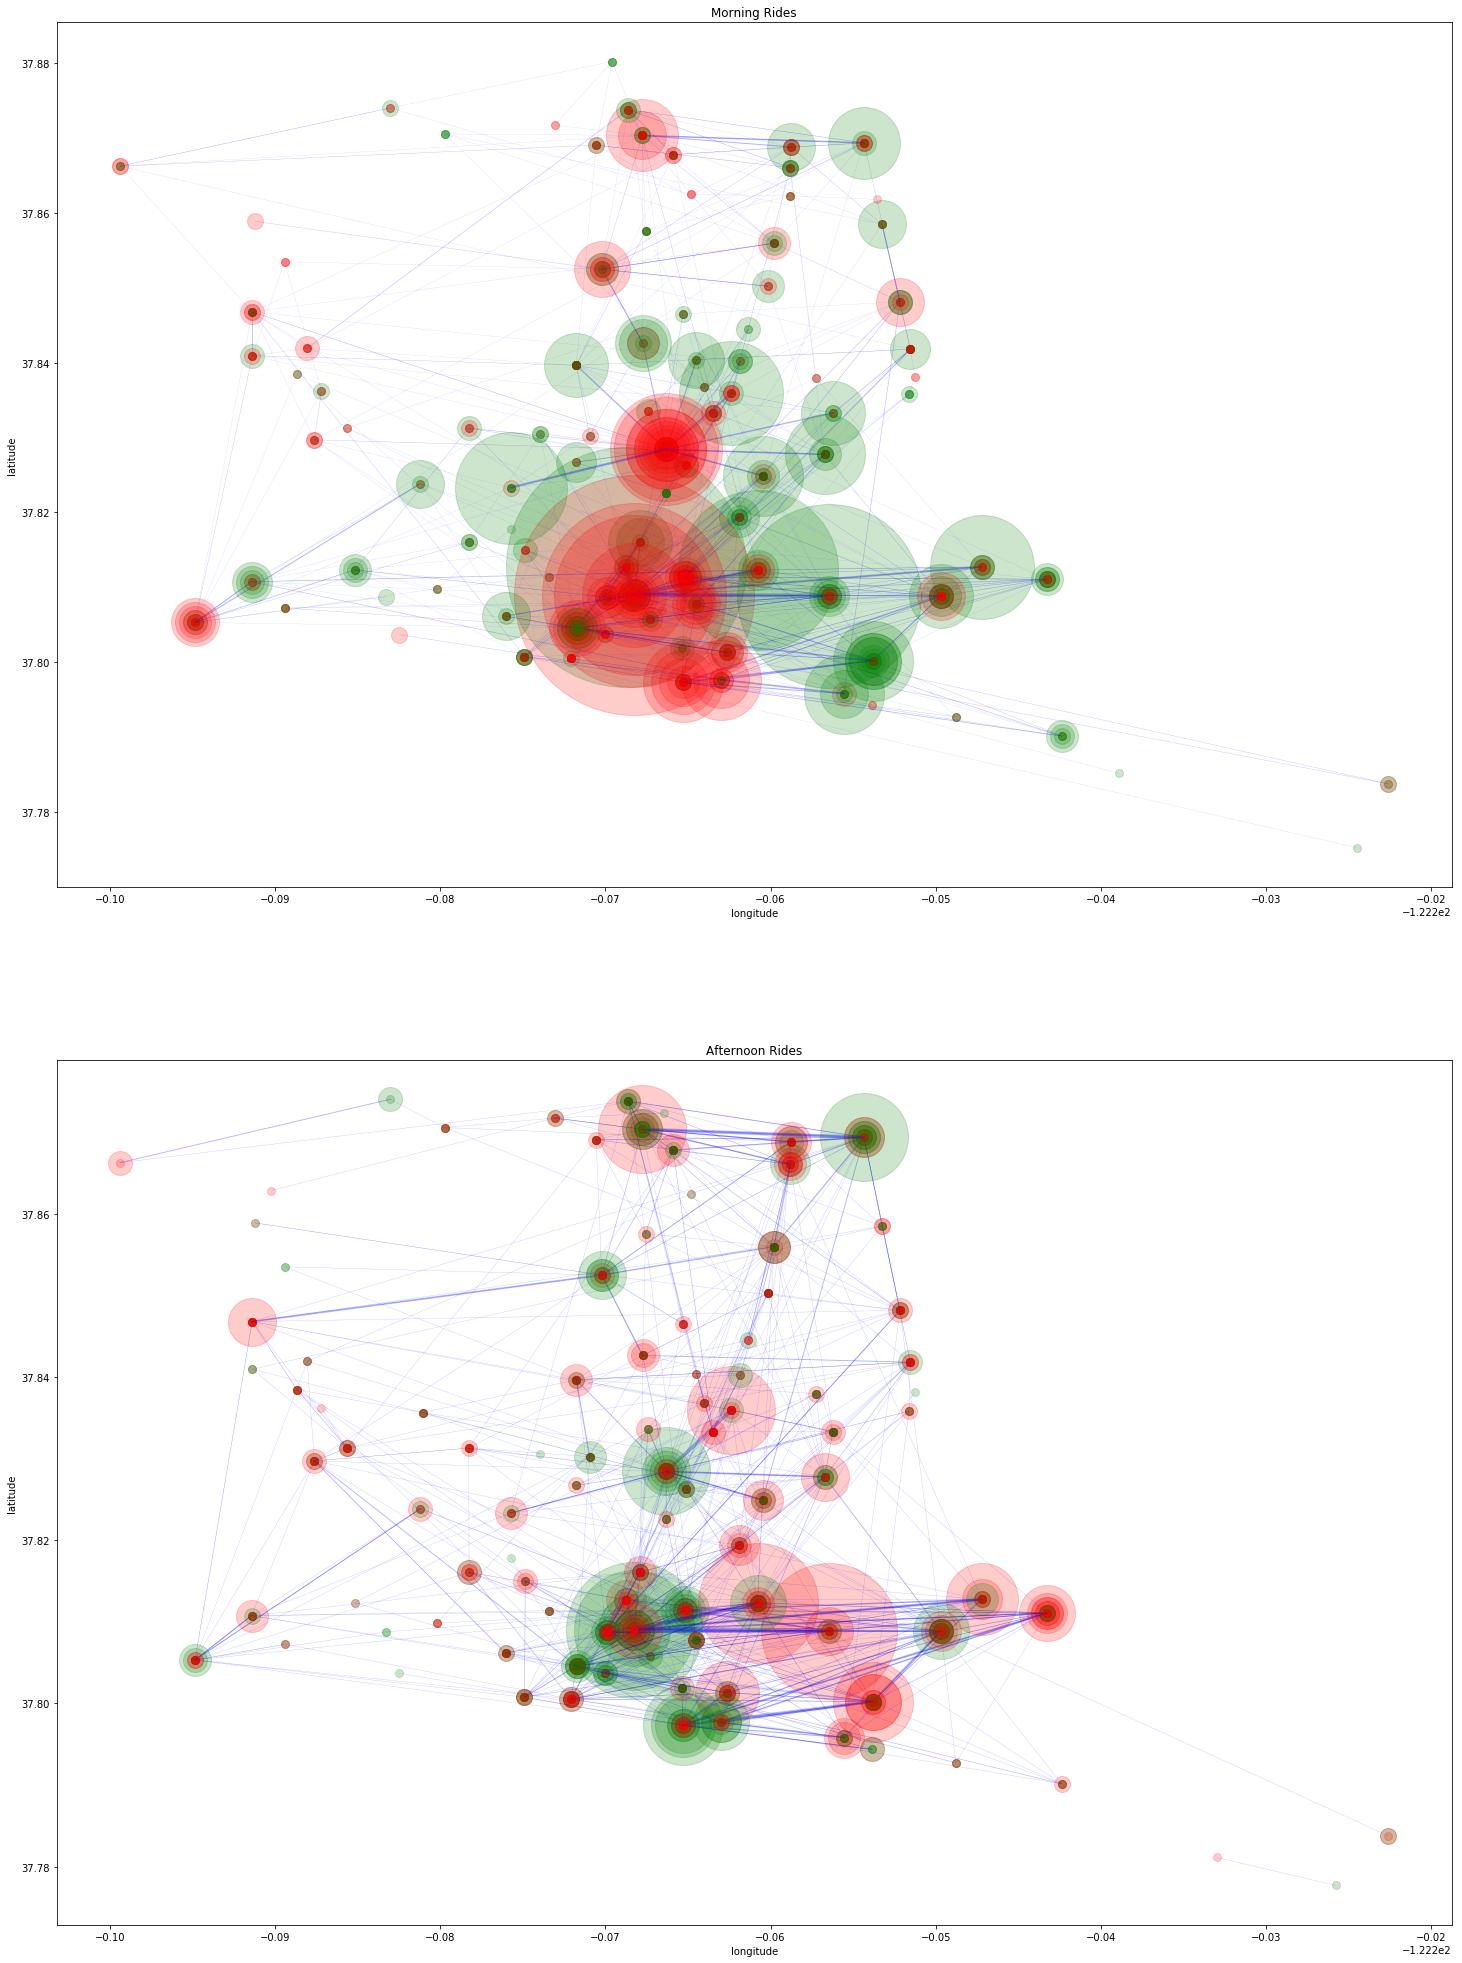

In [43]:
# separate the city database in morning and afternoon
morning = oakland[oakland["start_time"].dt.hour < 12]
afternoon = oakland[oakland["start_time"].dt.hour >= 12]

# plotting morning
samples = np.random.choice(morning.index, 1000, replace = False)
rides_sample = morning.loc[samples,:]

ig, ax = plt.subplots(nrows = 2, figsize = [25,35])
routes_count = rides_sample.groupby('route')['duration_sec'].count()
routes_x1 = rides_sample.groupby('route')['start_station_longitude'].mean()
routes_x2 = rides_sample.groupby('route')['end_station_longitude'].mean()
routes_y1 = rides_sample.groupby('route')['start_station_latitude'].mean()
routes_y2 = rides_sample.groupby('route')['end_station_latitude'].mean()
ax[0].set_title('Morning Rides')
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
for i in range(len(routes_count)):
    y = [routes_y1[i], routes_y2[i]]
    x = [routes_x1[i], routes_x2[i]]
    size= routes_count[i]
    ax[0].plot(x, y, color='b', alpha=0.3, linewidth=5 * size / max(routes_count))
    ax[0].plot(x[0], y[0], color='g', alpha=0.2, marker='o', markersize=8 * size)
    ax[0].plot(x[1], y[1], color='r', alpha=0.2, marker='o', markersize=8 * size)

#plotting afternoon
samples = np.random.choice(afternoon.index, 1000, replace = False)
rides_sample = afternoon.loc[samples,:]

routes_count = rides_sample.groupby('route')['duration_sec'].count()
routes_x1 = rides_sample.groupby('route')['start_station_longitude'].mean()
routes_x2 = rides_sample.groupby('route')['end_station_longitude'].mean()
routes_y1 = rides_sample.groupby('route')['start_station_latitude'].mean()
routes_y2 = rides_sample.groupby('route')['end_station_latitude'].mean()
ax[1].set_title('Afternoon Rides')
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')
for i in range(len(routes_count)):
    y = [routes_y1[i], routes_y2[i]]
    x = [routes_x1[i], routes_x2[i]]
    size= routes_count[i]
    ax[1].plot(x, y, color='b', alpha=0.3, linewidth=5 * size / max(routes_count))
    ax[1].plot(x[0], y[0], color='g', alpha=0.2, marker='o', markersize=8 * size)
    ax[1].plot(x[1], y[1], color='r', alpha=0.2, marker='o', markersize=8 * size)

**San Jose**

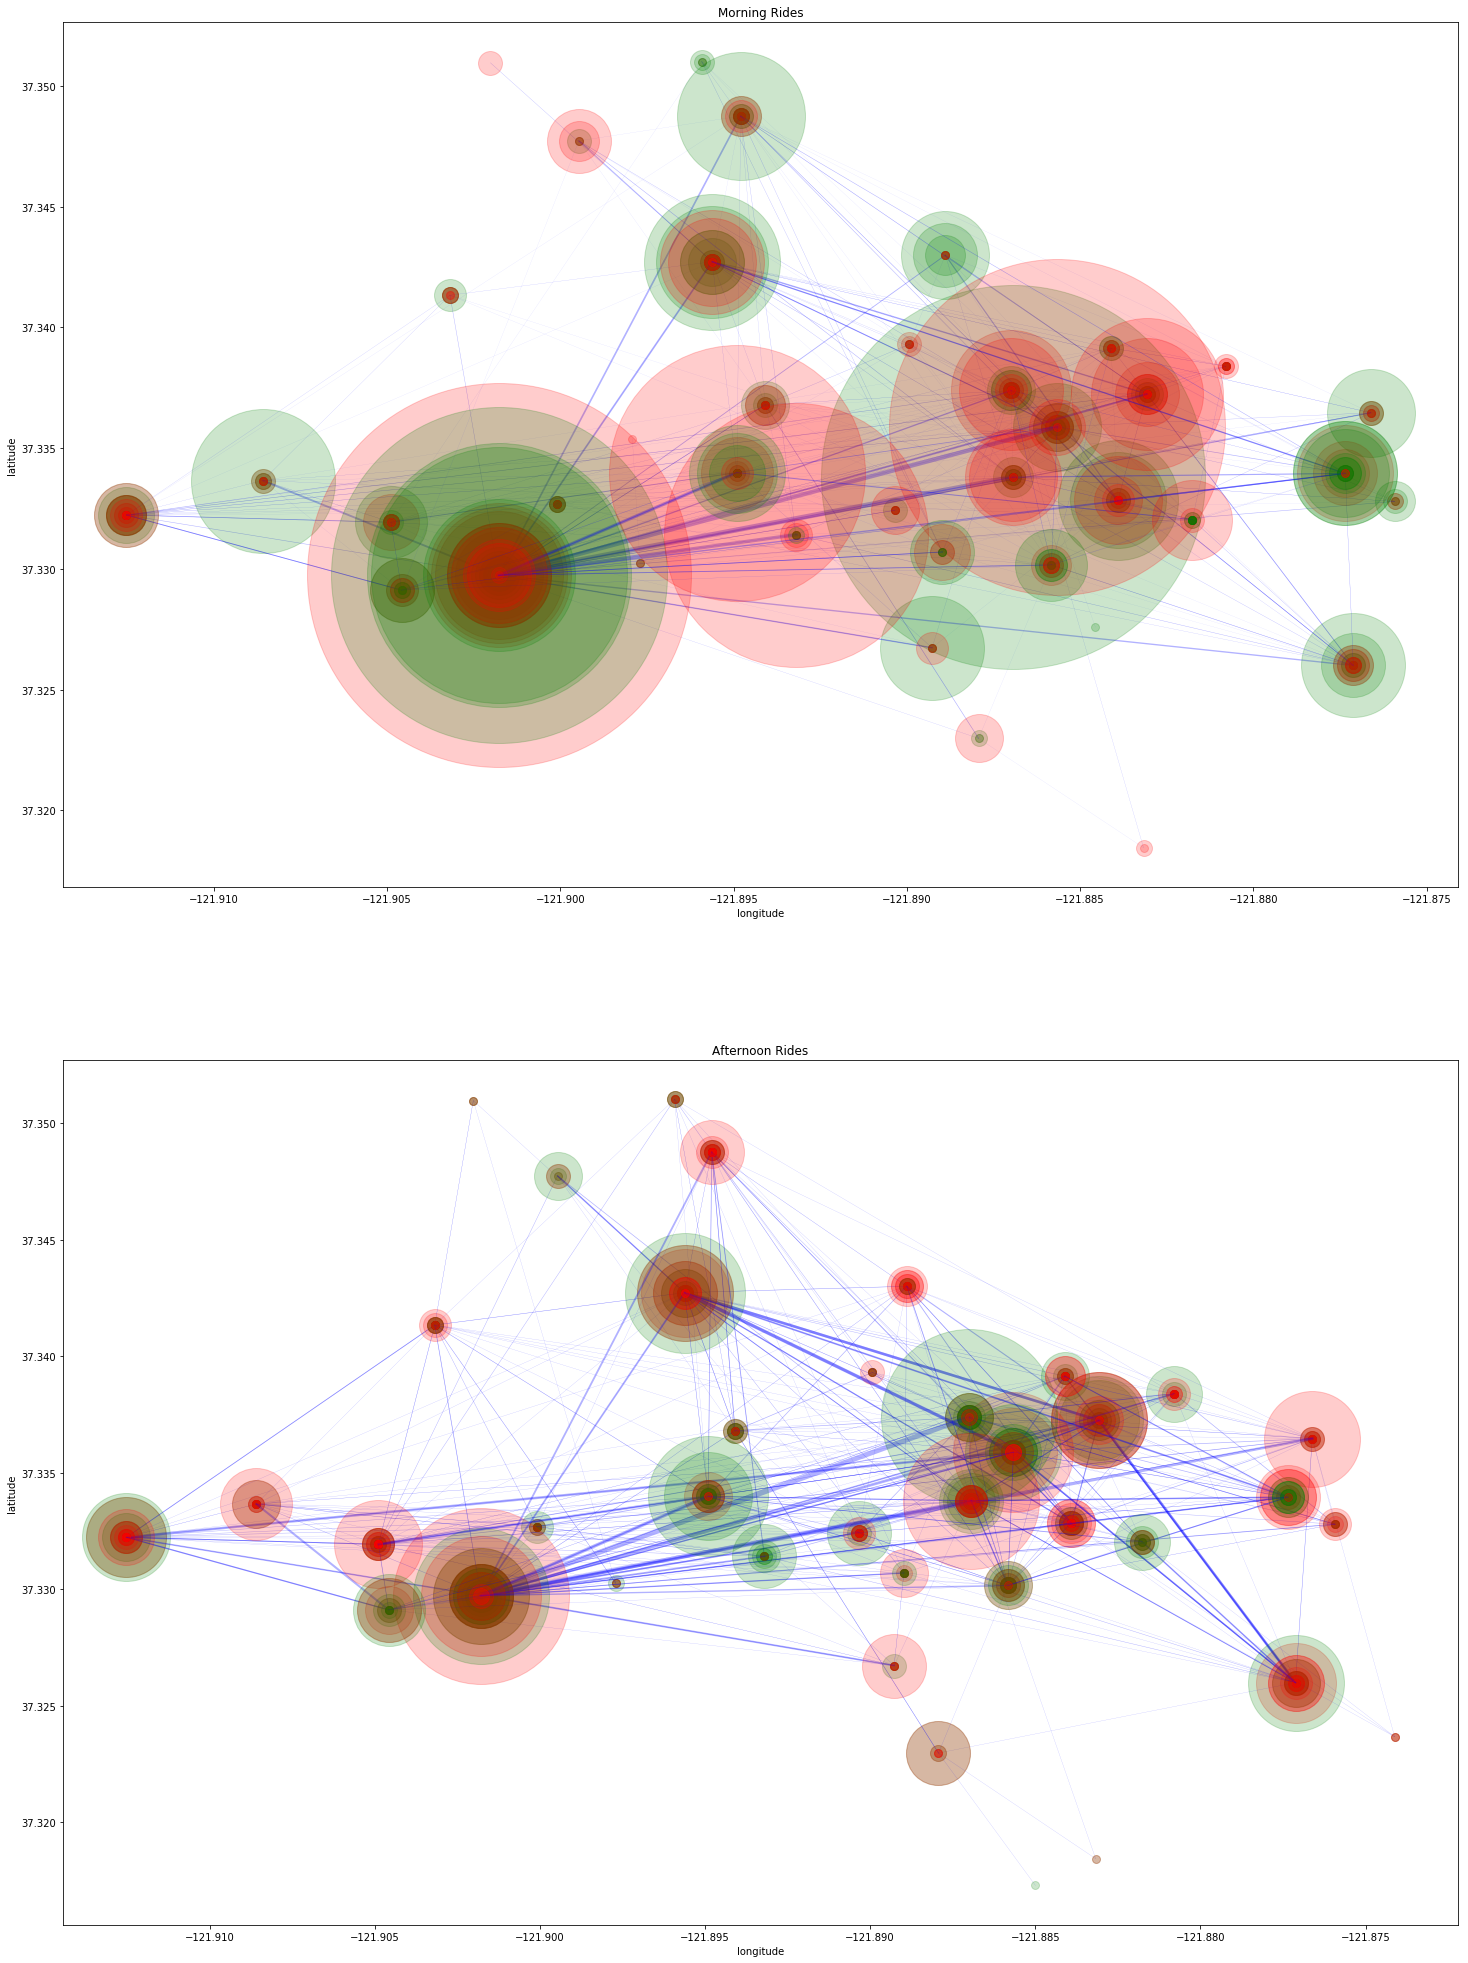

In [44]:
# separate the city database in morning and afternoon
morning = sanJose[sanJose["start_time"].dt.hour < 12]
afternoon = sanJose[sanJose["start_time"].dt.hour >= 12]

# plotting morning
samples = np.random.choice(morning.index, 1000, replace = False)
rides_sample = morning.loc[samples,:]

ig, ax = plt.subplots(nrows = 2, figsize = [25,35])
routes_count = rides_sample.groupby('route')['duration_sec'].count()
routes_x1 = rides_sample.groupby('route')['start_station_longitude'].mean()
routes_x2 = rides_sample.groupby('route')['end_station_longitude'].mean()
routes_y1 = rides_sample.groupby('route')['start_station_latitude'].mean()
routes_y2 = rides_sample.groupby('route')['end_station_latitude'].mean()
ax[0].set_title('Morning Rides')
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
for i in range(len(routes_count)):
    y = [routes_y1[i], routes_y2[i]]
    x = [routes_x1[i], routes_x2[i]]
    size= routes_count[i]
    ax[0].plot(x, y, color='b', alpha=0.3, linewidth=5 * size / max(routes_count))
    ax[0].plot(x[0], y[0], color='g', alpha=0.2, marker='o', markersize=8 * size)
    ax[0].plot(x[1], y[1], color='r', alpha=0.2, marker='o', markersize=8 * size)

#plotting afternoon
samples = np.random.choice(afternoon.index, 1000, replace = False)
rides_sample = afternoon.loc[samples,:]

routes_count = rides_sample.groupby('route')['duration_sec'].count()
routes_x1 = rides_sample.groupby('route')['start_station_longitude'].mean()
routes_x2 = rides_sample.groupby('route')['end_station_longitude'].mean()
routes_y1 = rides_sample.groupby('route')['start_station_latitude'].mean()
routes_y2 = rides_sample.groupby('route')['end_station_latitude'].mean()
ax[1].set_title('Afternoon Rides')
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')
for i in range(len(routes_count)):
    y = [routes_y1[i], routes_y2[i]]
    x = [routes_x1[i], routes_x2[i]]
    size= routes_count[i]
    ax[1].plot(x, y, color='b', alpha=0.3, linewidth=5 * size / max(routes_count))
    ax[1].plot(x[0], y[0], color='g', alpha=0.2, marker='o', markersize=8 * size)
    ax[1].plot(x[1], y[1], color='r', alpha=0.2, marker='o', markersize=8 * size)


Last six graphics show us that in every city exist a flow of bikes tending to some points in the morning and to the other ways in the afternoon. They also allow us to see the main zones of every city.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part of the analysis became interesting to visualize how the routes are distributed within every city.
It was possible to identify bussy points and some tendencies in the morning flow oposed to the afternoon flow.

### Were there any interesting or surprising interactions between features?

> The most interesting observation is the exangable flow of bikes in the morning and afternoon which help to understand how people is moving in the city and where could the system reinforced in certain hours of the day.